In [ ]:
"""Lets do an example of the gambler's problem. This is example 4.3 in Sutton and Barto

The gambler starts off with some money s and can bet any amount of money up to the amount of money
he has. 
If he wins, he gets the amount he bet. 
If he loses, he loses the amount he bet. 
The gambler wins if he reaches 99 dollars, and loses if he goes broke.
The reward is 1 when he reaches 99 and zero otherwise.
"""

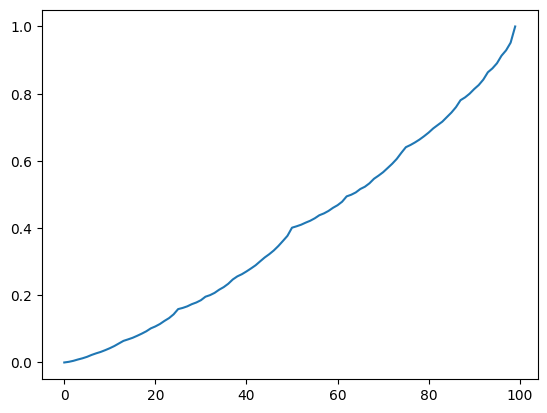

In [53]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.00001
p_heads = 0.4
discount = 0.99
win_condition = 99

def reward_func(val):
    if val == win_condition:
        return 1
    else:
        return 0

# lets start with an initial guess for the value function
V = np.zeros(win_condition + 1)
V[win_condition] = 1
error = 1e6
num_iters = 32
while error > epsilon and num_iters > 0:
    num_iters -= 1
    error = 0
    new_V = np.zeros(win_condition + 1)
    new_V[win_condition] = 1
    for i in range(1, win_condition):
        old_v = V[i]
        max_val = -1e6
        for j in range(1, min(i, win_condition-i)+1):
            if i + j == win_condition:
                heads_outcome = reward_func(i+j)
            else:
                heads_outcome = reward_func(i+j) + discount * V[i+j]
            if i - j == 0:
                tails_outcome = reward_func(i-j)
            else:
                tails_outcome = reward_func(i-j) + discount * V[i-j]
            value = p_heads * heads_outcome + (1 - p_heads) * tails_outcome
            if value > max_val:
                max_val = value
        new_V[i] = max_val
        error = max(error, abs(old_v - new_V[i]))
    V = new_V
        
plt.figure()
plt.plot(V)

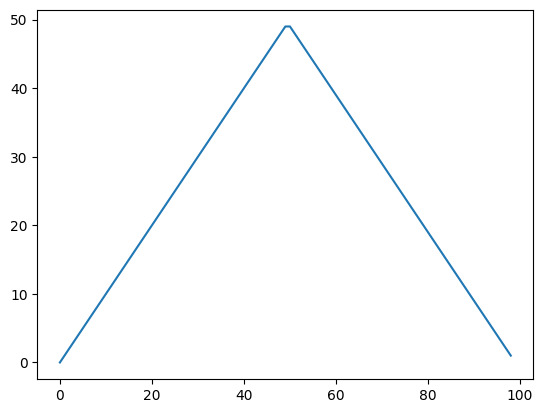

In [54]:
# Now lets compute the final policy
policy = np.zeros(win_condition)
for i in range(1, win_condition):
    max_val = -1e6
    for j in range(1, min(i, win_condition-i)+1):
        if i + j == win_condition:
            heads_outcome = reward_func(i+j)
        else:
            heads_outcome = reward_func(i+j) + discount * V[i+j]
        if i - j == 0:
            tails_outcome = reward_func(i-j)
        else:
            tails_outcome = reward_func(i-j) + discount * V[i-j]
        value = p_heads * heads_outcome + (1 - p_heads) * tails_outcome
        value = p_heads * heads_outcome + (1 - p_heads) * tails_outcome
        if value > max_val:
            max_val = value
            policy[i] = j

plt.figure()
plt.plot(policy)
plt.show()

In [55]:
V[101]

IndexError: index 101 is out of bounds for axis 0 with size 100